# **ES114 Probability Lab Assignment 8 - Correlation**
###&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**By Karan Sagar Gandhi (23110157)**

In this assignment, we were asked to import the iris dataset from seaborn and find the correlation between various attributes. Further I also performed exploratory dataanalysis on this dataset to better visualise how the different attributes are related to each other.
* **Part 1:** Here I find and print the mean and variance of all the attributes
* **Part 2:** Here I arrange the pairs of attributes in the descending order of their correlation coefficients.
* **Part 3:** Here I repeat the same for each of the 3 species.

## Importing Libraries
In this section I import different libraries that I will use for this project.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import math
from google.colab import output # To disable scrolling in the cells

## Loading the dataset

In this section I will load the iris dataset from seaborn

In [ ]:
data = sns.load_dataset('iris')

In [ ]:
data.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


## Defining Functions

Here I have defined various functions:

* **CalculateExpectationAndVariance:** This function will take in the dataset and calculate the expectation and the variance of the given data.
* **CalculateCorrelation:** This function will take in the data and the columns and return the correlation between the 2 columns.
* **CalculateAllCorrelations:** This will take in the entire dataset and then calculate the correlation arranged in decending order between all possible pairs of attributes.

In [ ]:
def CalculateExpectationAndVariance(data):
  data = np.array(data)
  mean = 0
  for i in range(len(data)):
    mean += data[i]

  mean /= len(data)
  var = 0

  for i in range(len(data)):
    var += (data[i] - mean) ** 2

  var /= len(data) - 1

  return mean, var

def CalculateCorrelation(data, a, b):
  # First we will calculate the mean and the variance of the 2 columns independently
  E_x, var_x = CalculateExpectationAndVariance(data.iloc[:, a])
  E_y, var_y = CalculateExpectationAndVariance(data.iloc[:, b])

  # Now we will find the covariance of the two columns
  covariance = 0
  for i in range(data.shape[0]):
    covariance += (data.iloc[i, a] - E_x) * (data.iloc[i, b] - E_y)

  covariance /= data.shape[0] - 1

  # Now we will find the correlation which is obtained by normalising the covariance with the standard deviation of the two columns
  return covariance / math.sqrt(var_x * var_y)


def CalculateAllCorrelations(data):
  correlations = []

  for i in range(4):
    for j in range(i + 1, 4):
      correlations.append((data.columns[i], data.columns[j], CalculateCorrelation(data, i, j)))

  correlations.sort(key=lambda x: -x[2])
  return correlations

## Part 1 - Estimating the Mean and the variance of each of the four attributes

In this section I will calculate the mean and variance of all the attributes of the given dataset

In [ ]:
mean = []
variance = []

for i in range(4):
  m, var = CalculateExpectationAndVariance(data.iloc[:, i])
  mean.append(m)
  variance.append(var)

print('Mean of the given data column wise:\n')
print('Mean Sepal Length', mean[0])
print('Mean Sepal Width', mean[1])
print('Mean Petal Length', mean[2])
print('Mean Petal Width', mean[3])

print('\nVariance of the given data column wise:\n')

print('Variance Sepal Length', variance[0])
print('Variance Sepal Width', variance[1])
print('Variance Petal Length', variance[2])
print('Variance Petal Width', variance[3])

Mean of the given data column wise:

Mean Sepal Length 5.843333333333335
Mean Sepal Width 3.057333333333334
Mean Petal Length 3.7580000000000027
Mean Petal Width 1.199333333333334

Variance of the given data column wise:

Variance Sepal Length 0.6856935123042505
Variance Sepal Width 0.1899794183445188
Variance Petal Length 3.1162778523489942
Variance Petal Width 0.5810062639821029


In [ ]:
for species in data['species'].unique():
  print(f'Mean and variance of each attributes for {species} species:')
  for i in range(4):
    m, var = CalculateExpectationAndVariance(data.loc[data['species'] == species, data.columns[i]])
    print(f'{species} - Mean and variance of {data.columns[i]} is: \nMean: {m} \nVariance: {var}\n')

  print()

Mean and variance of each attributes for setosa species:
setosa - Mean and variance of sepal_length is: 
Mean: 5.005999999999999 
Variance: 0.12424897959183666

setosa - Mean and variance of sepal_width is: 
Mean: 3.428000000000001 
Variance: 0.14368979591836734

setosa - Mean and variance of petal_length is: 
Mean: 1.4620000000000002 
Variance: 0.030159183673469397

setosa - Mean and variance of petal_width is: 
Mean: 0.2459999999999999 
Variance: 0.0111061224489796


Mean and variance of each attributes for versicolor species:
versicolor - Mean and variance of sepal_length is: 
Mean: 5.936 
Variance: 0.2664326530612246

versicolor - Mean and variance of sepal_width is: 
Mean: 2.7700000000000005 
Variance: 0.09846938775510206

versicolor - Mean and variance of petal_length is: 
Mean: 4.26 
Variance: 0.22081632653061237

versicolor - Mean and variance of petal_width is: 
Mean: 1.3259999999999998 
Variance: 0.039106122448979576


Mean and variance of each attributes for virginica specie

## Calculating the correlations in sorted decending order

In this section I print the correlations of all the possible pairs of attributes in decending order. I do this for the entire dataset and for each of the individual species also.

In [ ]:
print("ALl the unique species that are present in the given dataset: ", data['species'].unique())

ALl the unique species that are present in the given dataset:  ['setosa' 'versicolor' 'virginica']


In [ ]:
print("The correlation for all the pairs of the 4 attributes arranged in descending order:")

for a, b, correlation in CalculateAllCorrelations(data):
  print(f'Correlation between {a} and {b} is:', correlation)

The correlation for all the pairs of the 4 attributes arranged in descending order:
Correlation between petal_length and petal_width is: 0.9628654314027955
Correlation between sepal_length and petal_length is: 0.8717537758865829
Correlation between sepal_length and petal_width is: 0.817941126271576
Correlation between sepal_length and sepal_width is: -0.11756978413300208
Correlation between sepal_width and petal_width is: -0.36612593253643944
Correlation between sepal_width and petal_length is: -0.42844010433054


In [ ]:
for species in data['species'].unique():
  print(f"The correlation for all the pairs of the 4 attributes arranged in descending order for {species}:")
  for a, b, correlation in CalculateAllCorrelations(data[data['species'] == species]):
    print(f'Correlation between {a} and {b} is:', correlation)
  print()

The correlation for all the pairs of the 4 attributes arranged in descending order for setosa:
Correlation between sepal_length and sepal_width is: 0.7425466856651595
Correlation between petal_length and petal_width is: 0.3316300408041185
Correlation between sepal_length and petal_width is: 0.2780983529359694
Correlation between sepal_length and petal_length is: 0.26717575886875716
Correlation between sepal_width and petal_width is: 0.23275201136287943
Correlation between sepal_width and petal_length is: 0.17769996678227068

The correlation for all the pairs of the 4 attributes arranged in descending order for versicolor:
Correlation between petal_length and petal_width is: 0.7866680885228168
Correlation between sepal_length and petal_length is: 0.7540489585920161
Correlation between sepal_width and petal_width is: 0.6639987200241116
Correlation between sepal_width and petal_length is: 0.560522091692982
Correlation between sepal_length and petal_width is: 0.5464610715986299
Correlation

## Performing EDA (exploratory data analysis) over the set of features in the dataset.

In this section I will visualise each pair of the given dataset using a scatter plot. In this section we will get a better idea about how each variable is correlated with each other.

In [ ]:
def EDA(data, title):
  # data.plot.scatter(data.columns[0], data.columns[1])
  correlations = CalculateAllCorrelations(data)
  plt.figure(figsize=(6 * len(correlations) // 2, 12))
  idx = 0
  plt.suptitle(title, fontsize=15)
  for a, b, correlation in correlations:
    plt.subplot(2, len(correlations) // 2, 1 + idx)
    plt.scatter(data[a], data[b], alpha=0.4)
    plt.xlabel(a)
    plt.ylabel(b)
    idx += 1
    plt.title(f'{a} and {b} has correlation {correlation}')
    plt.tight_layout()
  plt.show()

### Part 2 - Arrange the pairs of attributes in the descending order of their correlation coefficients for the entire dataset

<IPython.core.display.Javascript object>

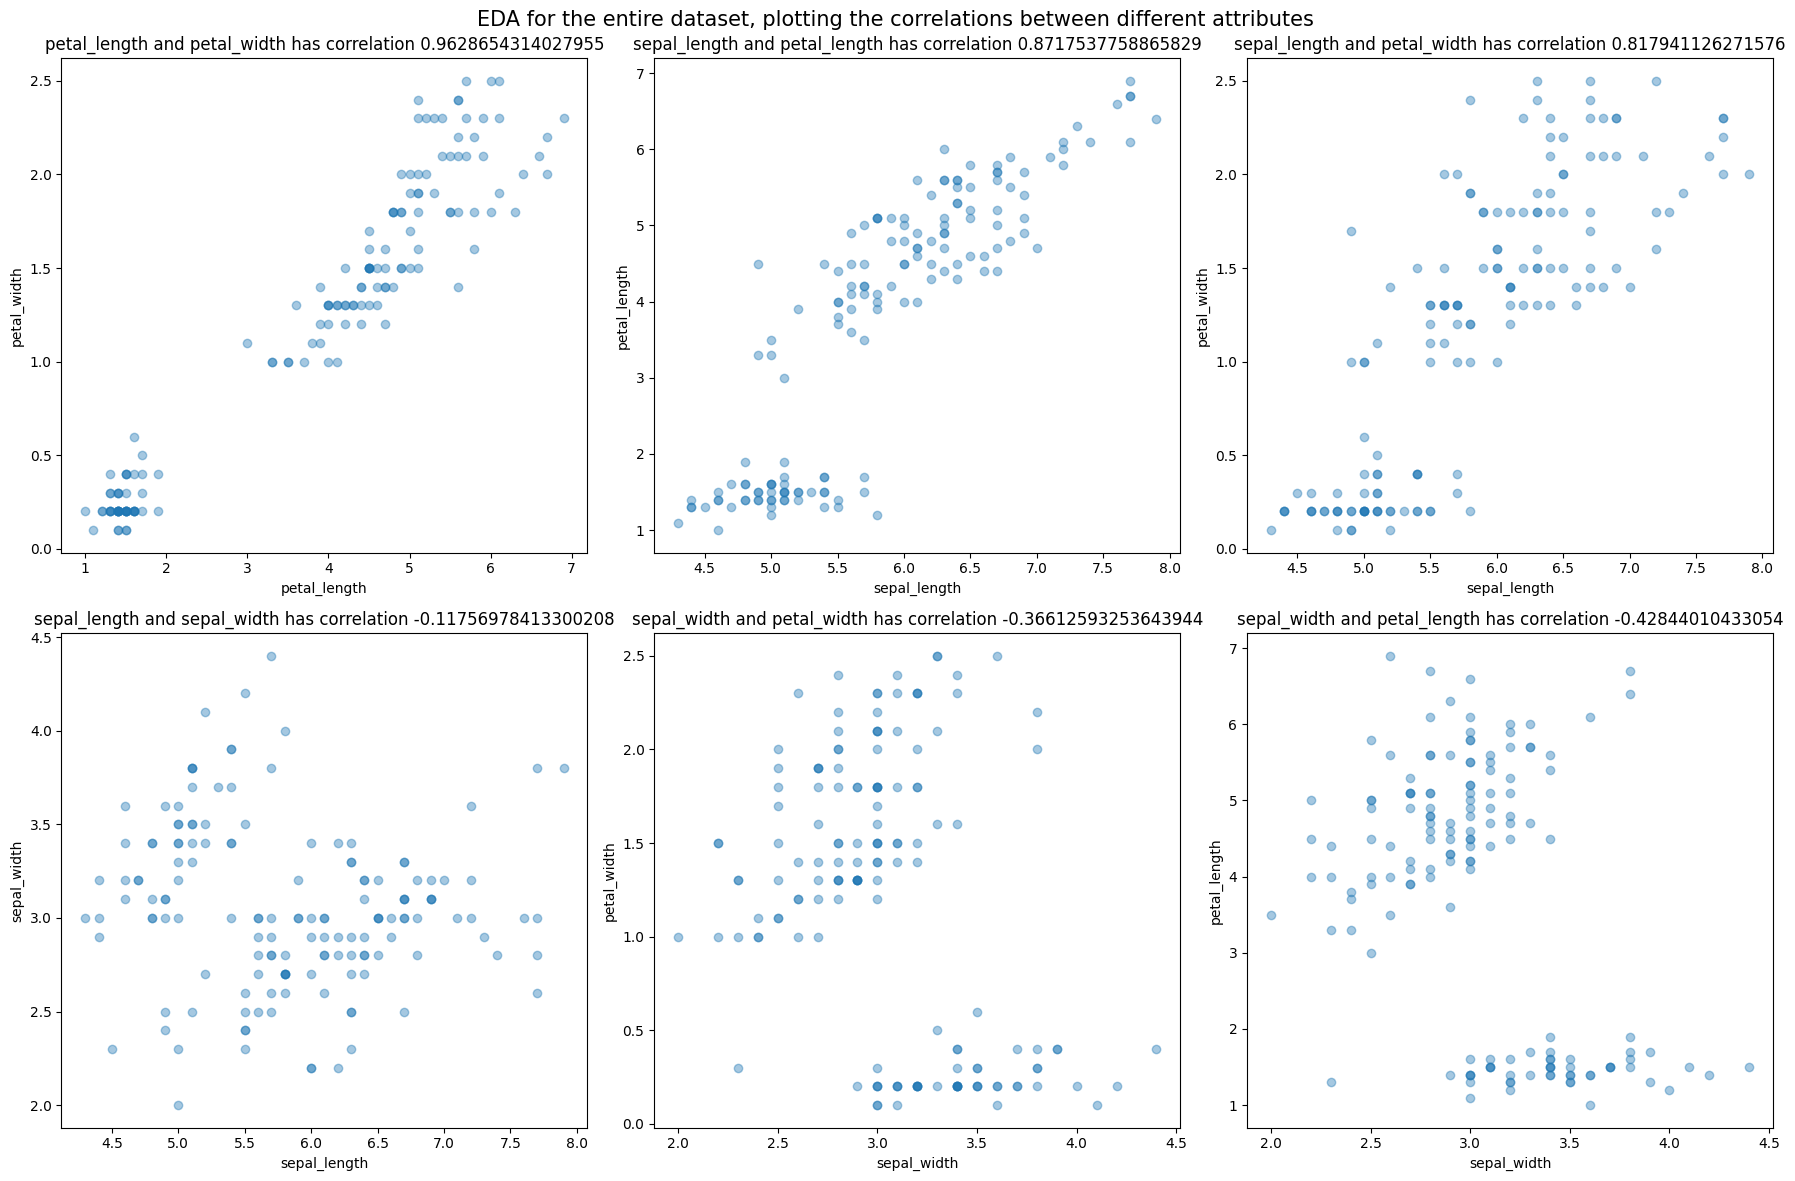

In [ ]:
output.no_vertical_scroll()

EDA(data, 'EDA for the entire dataset, plotting the correlations between different attributes')

### Part 3 - Arrange the pairs of attributes in the descending order of their correlation coefficients for the different species.

<IPython.core.display.Javascript object>

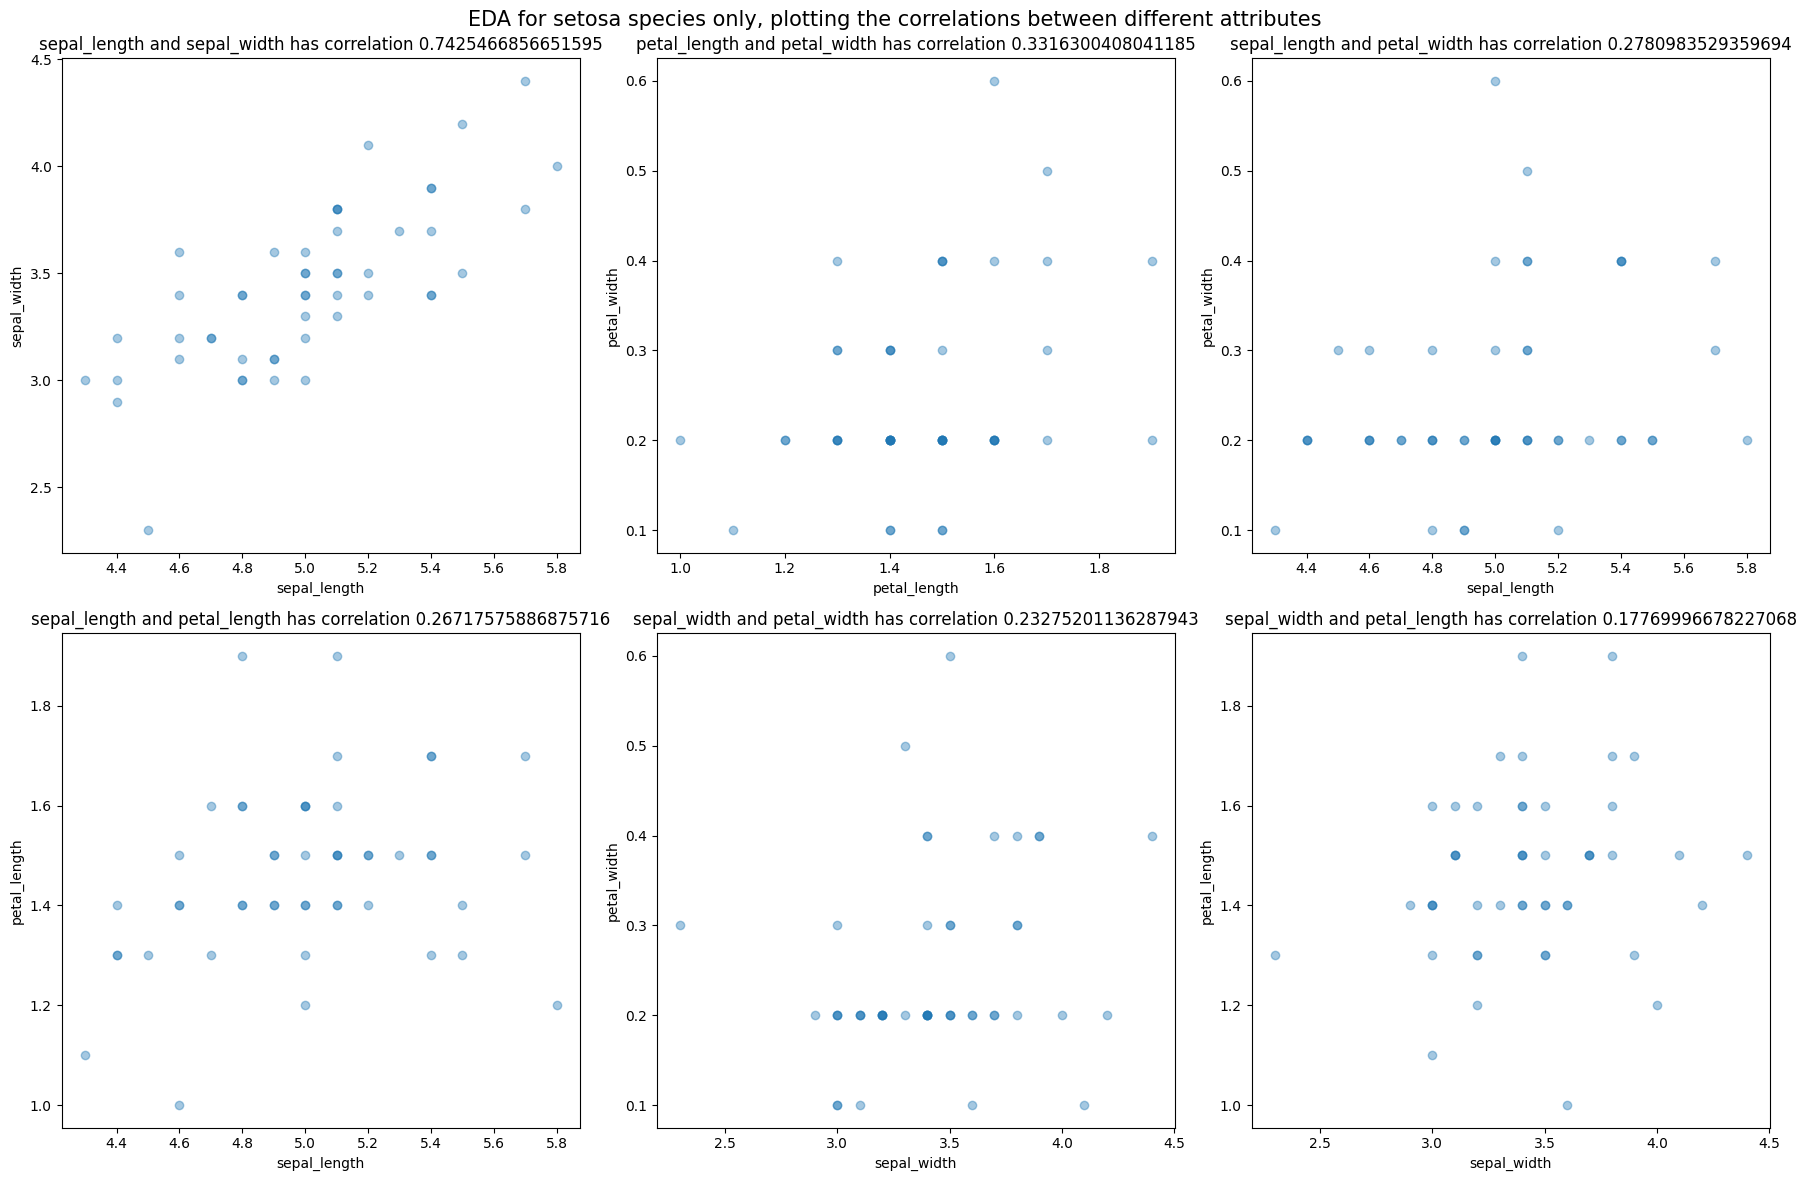

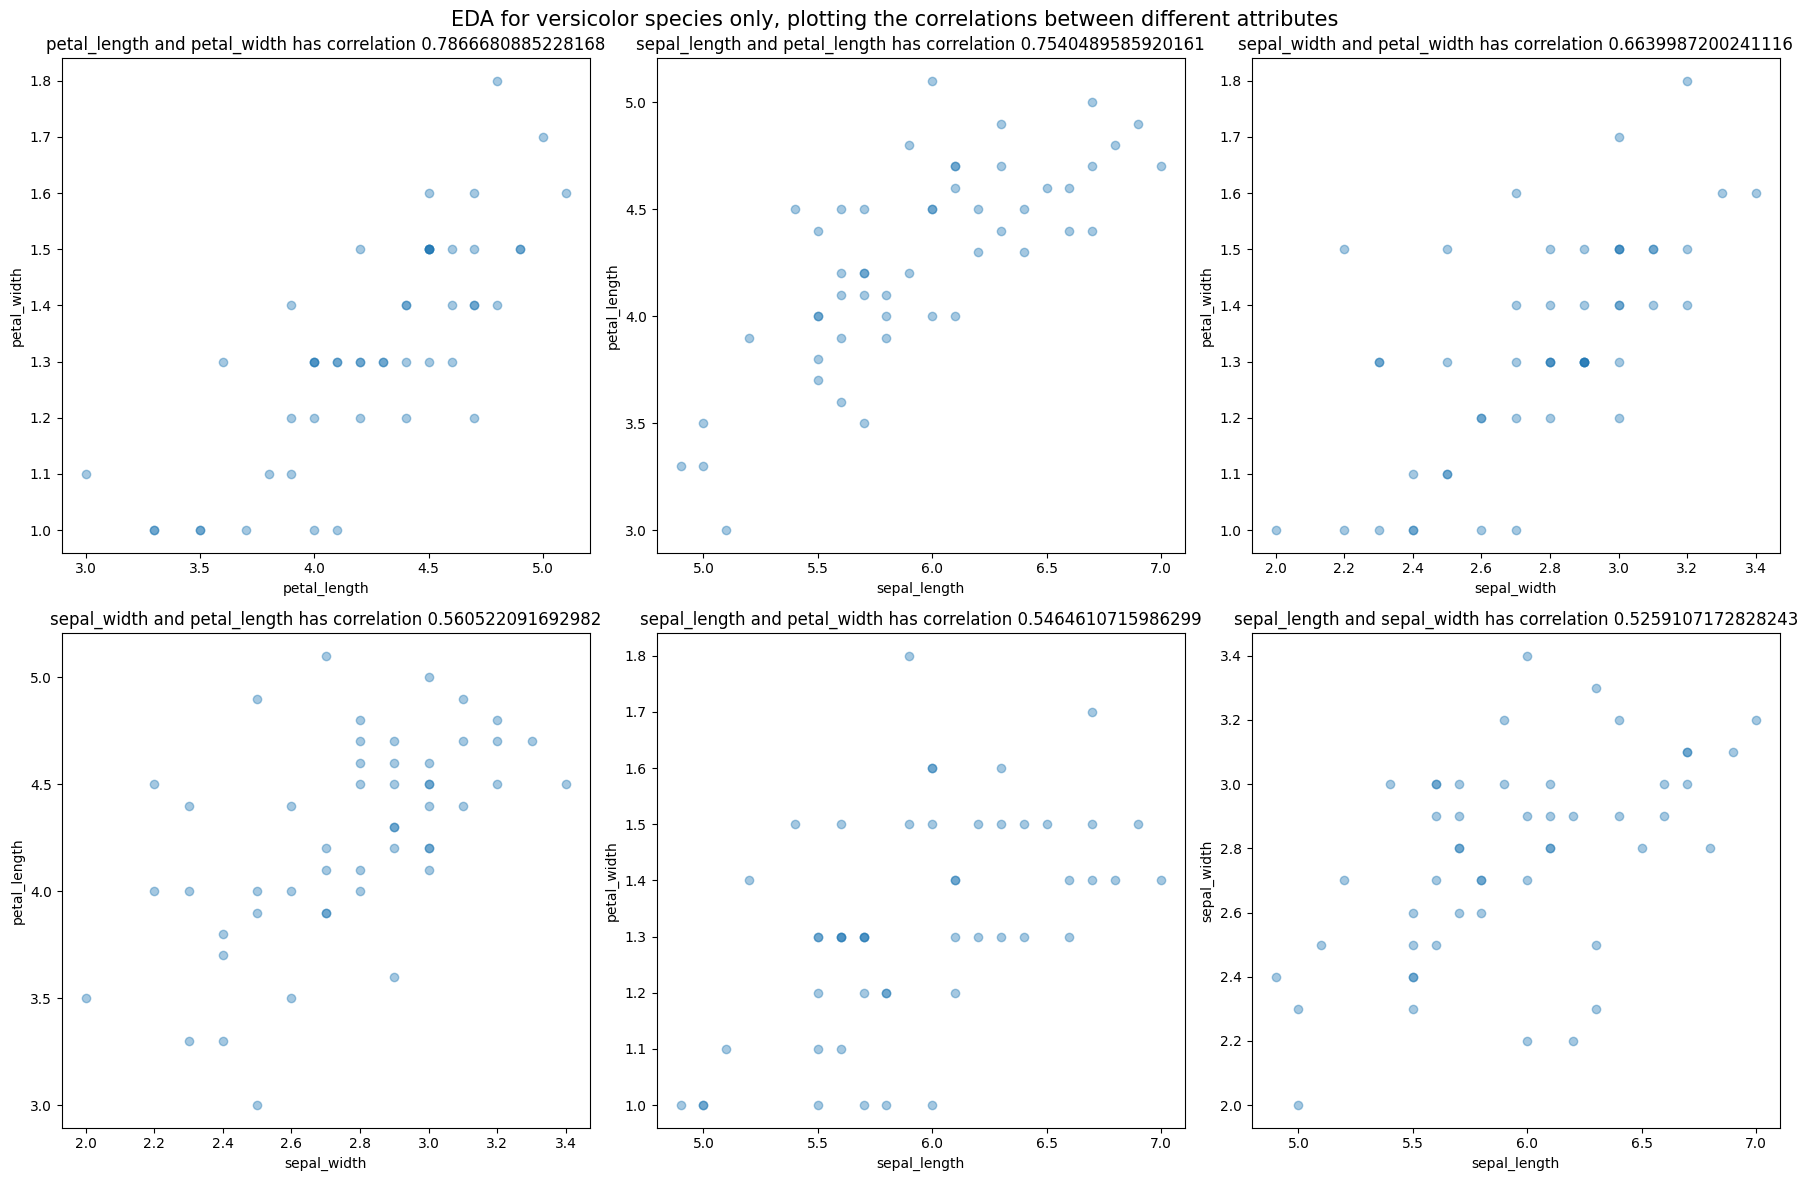

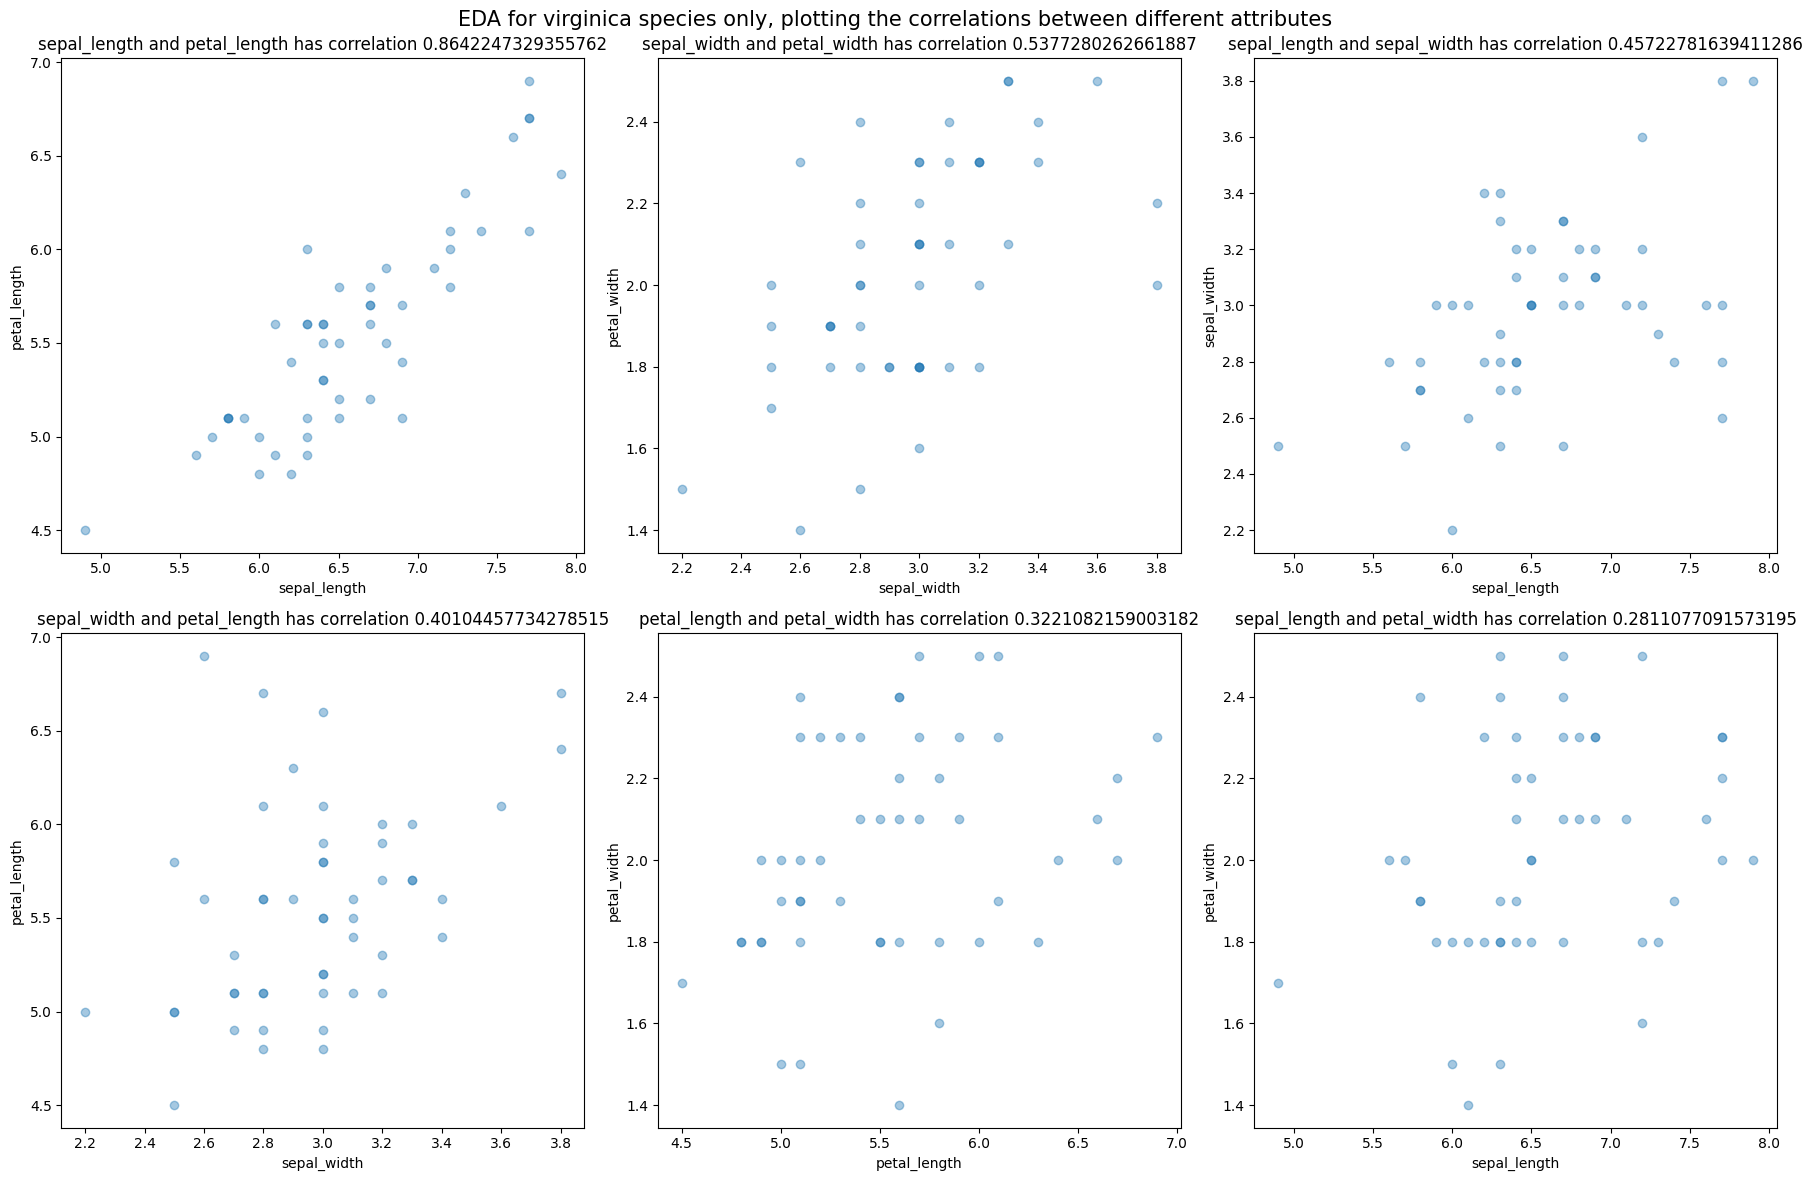

In [ ]:
output.no_vertical_scroll()

for entry in data['species'].unique():
  EDA(data[data['species'] == entry], f'EDA for {entry} species only, plotting the correlations between different attributes')
  print()

## References

1. “Google Colaboratory: Is there any way to expand the height of the result cell of running a code?,” _Stack Overflow_. https://stackoverflow.com/questions/55546869/google-colaboratory-is-there-any-way-to-expand-the-height-of-the-result-cell-of (accessed Mar. 02, 2024).